In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
covid_data_kaggle_df = pd.read_csv('../Data/covid_data_kaggle.csv')
covid_data_kaggle_df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [3]:
covid_data_kaggle_df.rename(columns = {
    'PATIENT_TYPE':'Type of Care', 
    'CLASIFFICATION_FINAL':'Covid Test Findings', 
    'INMSUPR':'Immuno-supression',
    'ICU': 'Intensive Care Unit Transfer'}, 
    inplace = True)

# Remove two columns name is 'MEDICAL_UNIT' and 'USMER' since we dont have sufficient information
covid_data_kaggle_df.drop(['MEDICAL_UNIT', 'USMER'], axis=1, inplace=True)
covid_data_kaggle_df.head(10)


,SEX,Type of Care,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,Immuno-supression,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,Covid Test Findings,Intensive Care Unit Transfer
0,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
5,1,2,9999-99-99,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2
6,1,1,9999-99-99,97,2,64,2,2,2,2,2,2,2,2,2,2,2,3,97
7,1,1,9999-99-99,97,1,64,2,1,2,2,1,1,2,2,2,1,2,3,97
8,1,2,9999-99-99,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,2
9,1,2,9999-99-99,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2


In [4]:
# Convert column titles to lowercase with first letter capitalized
covid_data_kaggle_df.columns = [col.lower().capitalize() for col in covid_data_kaggle_df.columns]
covid_data_kaggle_df['Sex'] = covid_data_kaggle_df['Sex'].replace(1,'Female')
covid_data_kaggle_df['Sex'] = covid_data_kaggle_df['Sex'].replace(2,'Male')

covid_data_kaggle_df['Type of care'] = covid_data_kaggle_df['Type of care'].replace(1,'Returned Home')
covid_data_kaggle_df['Type of care'] = covid_data_kaggle_df['Type of care'].replace(2,'Hospitalization')
covid_data_kaggle_df['Date_died'] = covid_data_kaggle_df['Date_died'].replace('9999-99-99','-')

In [5]:
exclude_columns = ['Age', 'Covid test findings']
for col in covid_data_kaggle_df.columns:
    if col not in exclude_columns:
        covid_data_kaggle_df[col] = covid_data_kaggle_df[col].replace(1, 'Yes')
        covid_data_kaggle_df[col] = covid_data_kaggle_df[col].replace(2, 'No')
        covid_data_kaggle_df[col] = covid_data_kaggle_df[col].replace(97, '-')
        covid_data_kaggle_df[col] = covid_data_kaggle_df[col].replace(98, '-')
        covid_data_kaggle_df[col] = covid_data_kaggle_df[col].replace(99, '-')



In [6]:
# Checking for Nan for each column
covid_data_kaggle_df.isna().sum()

Sex                             0
Type of care                    0
Date_died                       0
Intubed                         0
Pneumonia                       0
Age                             0
Pregnant                        0
Diabetes                        0
Copd                            0
Asthma                          0
Immuno-supression               0
Hipertension                    0
Other_disease                   0
Cardiovascular                  0
Obesity                         0
Renal_chronic                   0
Tobacco                         0
Covid test findings             0
Intensive care unit transfer    0
dtype: int64

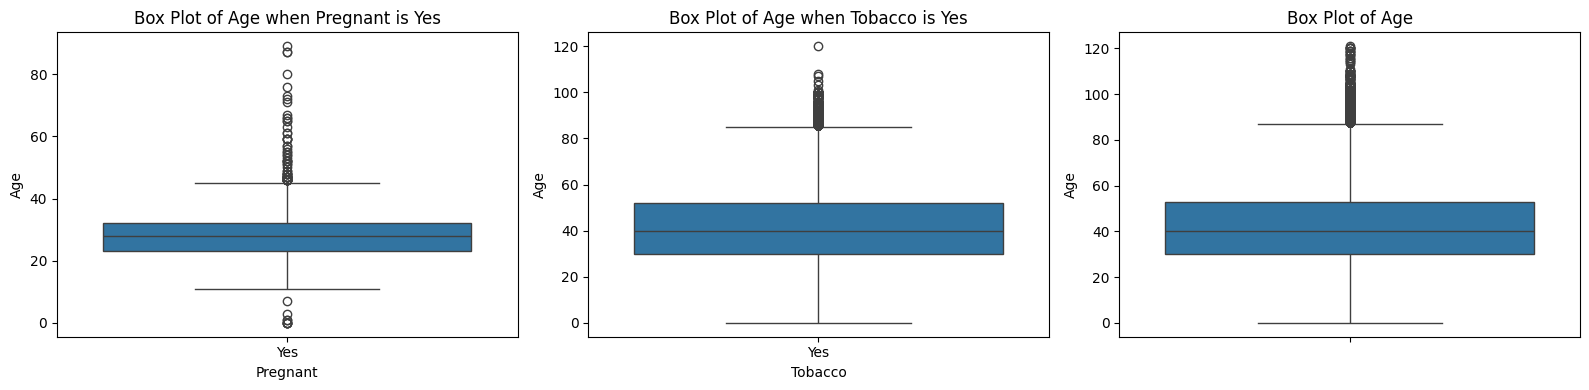

In [7]:
# Detecting outliers first based on age and pregrancy
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Subplot for 'Pregnant' == 'Yes'
sns.boxplot(x='Pregnant', y='Age', data=covid_data_kaggle_df[covid_data_kaggle_df['Pregnant'] == 'Yes'], ax=axes[0])
axes[0].set_title('Box Plot of Age when Pregnant is Yes')

# Subplot for 'Pregnant' == 'No'
sns.boxplot(x='Tobacco', y='Age', data=covid_data_kaggle_df[covid_data_kaggle_df['Tobacco'] == 'Yes'], ax=axes[1])
axes[1].set_title('Box Plot of Age when Tobacco is Yes')

# Subplot for Age
sns.boxplot(y='Age', data=covid_data_kaggle_df, ax=axes[2])
axes[2].set_title('Box Plot of Age')

# Adjust layout
plt.tight_layout()
plt.show()

In [8]:
# Remove outliers using IQR method
Q1 = covid_data_kaggle_df[covid_data_kaggle_df['Pregnant'] == 'Yes']['Age'].quantile(0.25)
Q3 = covid_data_kaggle_df[covid_data_kaggle_df['Pregnant'] == 'Yes']['Age'].quantile(0.75)
IQR = Q3 - Q1

covid_data_kaggle_df = covid_data_kaggle_df[~((covid_data_kaggle_df['Pregnant'] == 'Yes') & ((covid_data_kaggle_df['Age'] <= (Q1 - 1.5 * IQR)) | (covid_data_kaggle_df['Age'] > (Q3 + 1.5 * IQR))))]
covid_data_kaggle_df[covid_data_kaggle_df['Pregnant'] == 'Yes']['Age'].unique()

array([23, 30, 33, 25, 26, 34, 22, 24, 27, 31, 28, 29, 20, 38, 21, 44, 35,
       42, 39, 18, 40, 19, 43, 32, 37, 45, 36, 41, 15, 16, 17, 14, 12, 13,
       11], dtype=int64)

In [9]:
# Remove outliers using IQR method
covid_data_kaggle_df = covid_data_kaggle_df[~((covid_data_kaggle_df['Tobacco'] == 'Yes') & ((covid_data_kaggle_df['Age'] <= 10)))]

In [10]:
# Define the age bins and labels
age_bins = [0, 18, 34, 49, int(covid_data_kaggle_df['Age'].max())]  # Bins represent the upper age limit for each group
age_labels = ['0-18', '19-34', '35-49', '50+']
# Create the "Age Group" column using pd.cut
covid_data_kaggle_df['Age Group'] = pd.cut(covid_data_kaggle_df['Age'], bins=age_bins, labels=age_labels, right=False)
covid_data_kaggle_df['Age Group'].value_counts()


Age Group
35-49    349535
50+      342375
19-34    302200
0-18      54246
Name: count, dtype: int64

In [11]:
covid_test_bins = [1, 3, 7]  # Bins represent the upper age limit for each group
test_labels = ['Positive', 'Negative']
# Create the "Test Outcome" column 
covid_data_kaggle_df['Test Outcome'] = pd.cut(covid_data_kaggle_df['Covid test findings'], bins=covid_test_bins, labels=test_labels, right=True)
covid_data_kaggle_df.drop(['Covid test findings'], axis=1, inplace=True)

In [12]:
covid_data_kaggle_df['Passed_away'] = covid_data_kaggle_df.Date_died.apply(lambda x: 'No' if x=='-' else 'Yes')
covid_data_kaggle_df.columns

covid_data_kaggle_df.to_csv('updated_covid_data_kaggle.csv')

In [2]:
owid_data_df = pd.read_csv('../Data/owid-covid-data.csv')
owid_data_df.shape

(276440, 67)

In [3]:
nan_counts = owid_data_df.isna().sum()
columns_with_na = nan_counts[nan_counts > 0]

# Sort columns by the number of NaN values in descending order
sorted_columns_with_na = columns_with_na.sort_values(ascending=False)

for column_name, nan_count in sorted_columns_with_na.items():
    print(f"Column '{column_name}' has {nan_count} NaN values.")

Column 'weekly_icu_admissions' has 265996 NaN values.
Column 'weekly_icu_admissions_per_million' has 265996 NaN values.
Column 'excess_mortality' has 264557 NaN values.
Column 'excess_mortality_cumulative_absolute' has 264557 NaN values.
Column 'excess_mortality_cumulative' has 264557 NaN values.
Column 'excess_mortality_cumulative_per_million' has 264557 NaN values.
Column 'weekly_hosp_admissions_per_million' has 252659 NaN values.
Column 'weekly_hosp_admissions' has 252659 NaN values.
Column 'icu_patients' has 238265 NaN values.
Column 'icu_patients_per_million' has 238265 NaN values.
Column 'hosp_patients' has 236779 NaN values.
Column 'hosp_patients_per_million' has 236779 NaN values.
Column 'total_deaths_per_million' has 232025 NaN values.
Column 'total_deaths' has 232025 NaN values.
Column 'total_cases' has 228905 NaN values.
Column 'total_cases_per_million' has 228905 NaN values.
Column 'total_boosters' has 227391 NaN values.
Column 'total_boosters_per_hundred' has 227391 NaN va

In [4]:
owid_data_df.drop(columns=['excess_mortality', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality_cumulative_per_million'], inplace=True)

In [5]:
# Drop rows with NaN values in the 'total cases' column
owid_data_df = owid_data_df.dropna(subset=['total_cases']).reset_index(drop=True)

In [6]:
nan_counts_cleaned = owid_data_df.isna().sum()
columns_with_na_in_cleaned = nan_counts_cleaned[nan_counts_cleaned > 0]

# Sort columns by the number of NaN values in descending order
sorted_columns_with_na_cleaned = columns_with_na_in_cleaned.sort_values(ascending=False)

for column_name, nan_count in sorted_columns_with_na_cleaned.items():
    print(f"Column '{column_name}' has {nan_count} NaN values.")

Column 'weekly_icu_admissions' has 44697 NaN values.
Column 'weekly_icu_admissions_per_million' has 44697 NaN values.
Column 'weekly_hosp_admissions' has 43211 NaN values.
Column 'weekly_hosp_admissions_per_million' has 43211 NaN values.
Column 'hosp_patients' has 42452 NaN values.
Column 'hosp_patients_per_million' has 42452 NaN values.
Column 'icu_patients' has 42050 NaN values.
Column 'icu_patients_per_million' has 42050 NaN values.
Column 'total_boosters' has 40517 NaN values.
Column 'total_boosters_per_hundred' has 40517 NaN values.
Column 'new_vaccinations' has 39422 NaN values.
Column 'people_fully_vaccinated' has 37093 NaN values.
Column 'people_fully_vaccinated_per_hundred' has 37093 NaN values.
Column 'new_tests_per_thousand' has 37057 NaN values.
Column 'new_tests' has 37057 NaN values.
Column 'people_vaccinated' has 36681 NaN values.
Column 'people_vaccinated_per_hundred' has 36681 NaN values.
Column 'total_tests' has 36342 NaN values.
Column 'total_tests_per_thousand' has 

In [8]:
columns_to_exclude = [
    'reproduction_rate', 
    'weekly_icu_admissions', 
    'weekly_icu_admissions_per_million', 
    'weekly_hosp_admissions',
    'weekly_hosp_admissions_per_million',
    'total_tests_per_thousand',
    'positive_rate',
    'tests_per_case',
    'tests_units',
    'total_vaccinations',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'total_boosters_per_hundred',
    'median_age',
    'aged_65_older',
    'aged_70_older',
    'cardiovasc_death_rate',
    'female_smokers',
    'male_smokers',
    'hospital_beds_per_thousand',
    'life_expectancy'
    ]
# Drop columns with the substring 'new' in their titles

owid_data_df = owid_data_df.drop(columns=columns_to_exclude)
owid_data_df.shape


(47535, 41)

In [9]:
owid_data_df = owid_data_df.dropna(subset=['continent']).reset_index(drop=True)

# Convert 'date' column to datetime format
owid_data_df['date'] = pd.to_datetime(owid_data_df['date'])
# Define the date range to keep
start_date = pd.to_datetime('2020-04-01')
end_date = pd.to_datetime('2023-12-31')
owid_data_df['continent'].unique()
# Create a boolean mask for filtering
masked_data = (owid_data_df['date'] >= start_date) & (owid_data_df['date'] <= end_date) & (owid_data_df['continent'] != 0)

owid_data_df_cleaned = owid_data_df[masked_data]


In [11]:
owid_data_df_cleaned.to_csv('owid_data_cleaned.csv')